<h2>Outliers</h2>
Why you should worry about outlers?<br>
They affect the power of your models of generalizing over datasets. But remember not all outliers are bad. Some outliers may be indication of a case that you are missing or a case that your model is not prepared for.<br>
<p>Two types of outliers
<ul><li>Mild Outliers ->  Q1 - 1.5*IQR or Q3 + 1.5*IQR</li>
<li>Extreme outliers ->  Q1 - 3*IQR or Q3 + 3*IQR</li></ul></p>

<h2>Methods to deal with outliers</h2>

<h3>1) Univariate Method</h3>
The simplest of all methods. You just have to look for extreme values.<br>
For example if you have a dataset where all values are less than 100 and you observe a value of say 1000 than that is cleary a outlier.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Generate data
data = 10*np.random.randn(1,50)
print("Max = ", data.max())
print("Min = ",data.min())
print("Mean = ",data.mean())
print("Std = ",data.std())

Max =  27.01273659614438
Min =  -19.63742189358576
Mean =  1.4484865024436133
Std =  9.719028552541065


In [ ]:
# Add some external noise
data = np.append(data, [80,95,-40,-100])
print("Max = ", data.max())
print("Min = ",data.min())
print("Mean = ",data.mean())
print("Std = ",data.std())

Max =  95.0
Min =  -100.0
Mean =  1.989339354114457
Std =  24.205592413236193


Now you can use box plots to deal with the problem.<br>
<h3>Boxplots</h3>
<img src = "box_plot.png" align = "center"></img>

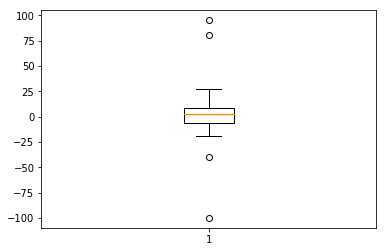

In [ ]:
# In this case you can clearly identify the outliers
plt.boxplot(data)
plt.show()

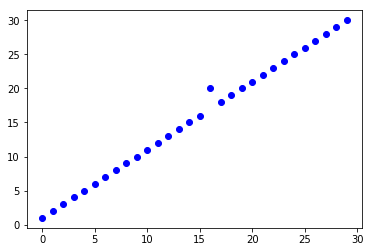

In [ ]:
# But in some cases when the outliers are part of the interquartile range. This method would fail.
data1 = np.arange(1,31).reshape((30,1))
data1[16,0] = 20

plt.plot(data1, 'bo')
plt.show()

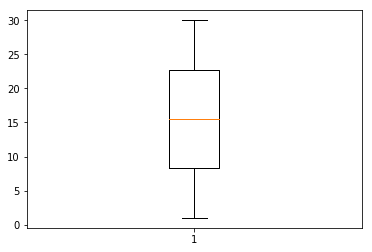

In [ ]:
# In this case if we draw a boxplot we would not be able to identify the outlier.
plt.boxplot(data1)
plt.show()

<h2>2) Multivariate Method</h2>
Now to solve the above problem you must notice a key fact that when the outlier occured it was not a extreme value. So what made this point an outlier was the fact that suddenly the data distribution did not follow the set pattern.<br>
In this method we first create a model using the entire data and then compare the actual and the preduicted values of our model and if their difference is above a threshold we treat that point as an outlier.

In [ ]:
# For illlustration purpose I create a simple linear regression model
# Although you should prefer a neural network for the purpose
b = np.zeros((1, 1))
W = np.zeros((1, 1))
learning_rate = 0.0001
iterations = 1000

X = np.arange(1,31).reshape((30,1))
Y = np.copy(data1)

for _ in range(iterations):
    y_hat = b + np.dot(X, W)
    err = Y - y_hat
    error = np.sum(np.square(err), axis = 0)
    
    db = -2*np.sum(err, axis = 0)
    dW = -2*np.dot(X.T, err)

    b = b - learning_rate*db
    W = W - learning_rate*dW

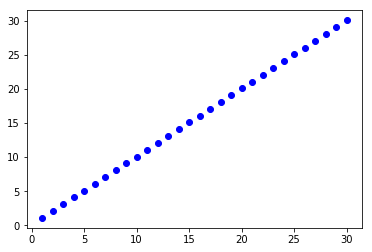

In [ ]:
# This is the model learned by our model
plt.plot(X, y_hat, 'bo')
plt.show()

[]

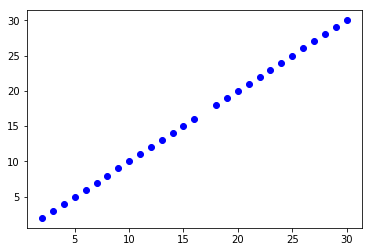

In [ ]:
# Now set some threshold error value
X = np.arange(1,31).reshape(30,1)
threshold = 2
err = np.abs(data1 - y_hat)
for a in range(data1.shape[0]):
    if err[a,0] > threshold:
        new_data = np.delete(data1, [a,0])
        X = np.delete(X, [a,0])

plt.plot(X, new_data, 'bo')
plt.plot()

In [ ]:
data1.shape

(30, 1)

<h2>3) Minkowski error</h2>
This method does not remove outliers but it reduces the impact that outliers have on the data.<br>
One way to implement it is by remembering that we train our models using Mean Sqaured Loss(MSE). So when we take the square of the differece between y and y_predicted we are essentially squaring the errors and increasing the errors even more.<br>
So you can reduce the power of MSE, instead of using 2 use, say 1.5.

<h2>4) Histograms</h2>

In [ ]:
data = 10*np.random.randn(1,50)
data = np.append(data, [80,95,-40,-100])

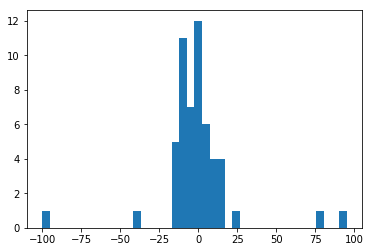

In [ ]:
plt.hist(data, TT)
plt.show()

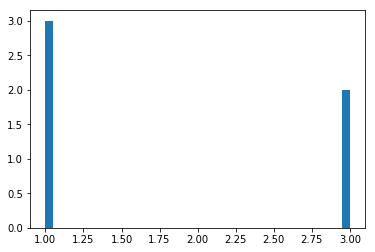

In [ ]:
x = np.array([1,1,1,3,3])
plt.hist(x, bins = 40)
plt.show()